In [1]:
from src.utils import *
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import cv2
import os

# Directory containing the images
image_dir = "Dataset_CvDl_Hw1/Q2_Image"

# Initialize an empty list to store the images
images = []

# Iterate over the files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".bmp"):
        # Construct the full file path
        file_path = os.path.join(image_dir, filename)
        
        # Read the image and append it to the list
        image = cv2.imread(file_path)
        if image is not None:
            images.append(image)
        else:
            print(f"Failed to read image: {file_path}")

# Now, the 'images' list contains all the images from the directory


In [3]:
fs = cv2.FileStorage("Dataset_CvDl_Hw1/Q2_Image/Q2_lib/alphabet_lib_onboard.txt", cv2.FILE_STORAGE_READ)
string = "BENIIR"
if not string.isupper():
    string = string.upper()

q2_objps, q2_imageps = calibration(images)
char_in_board = [ # coordinate for 6 charter in board (x, y) ==> (w, h)
    [7,5,0], # slot 1
    [4,5,0], # slot 2
    [1,5,0], # slot 3
    [7,2,0], # slot 4
    [4,2,0], # slot 5
    [1,2,0]  # slot 6
]

for index, image in enumerate(images):
    h, w = image.shape[:2]
    draw_image = image.copy()
    ret, intrinsic_mtx, dist, rvecs, tvecs = cv2.calibrateCamera(q2_objps, q2_imageps, (w,h), None, None)
    if ret:
        rvec = np.array(rvecs[index])
        tvec = np.array(tvecs[index]).reshape(3,1)
        for i_char, character in enumerate(string):
            ch = np.float32(fs.getNode(character).mat())
            line_list = []
            for i, eachline in  enumerate(ch):
                ach = np.float32([char_in_board[i_char], char_in_board[i_char]])
                eachline = np.add(eachline, ach)
                image_points, jac = cv2.projectPoints(eachline, rvec, tvec, intrinsic_mtx, dist)
                line_list.append(image_points)
                draw_image = draw_char(draw_image, line_list)
        cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB)
        plt.imshow(draw_image)
        plt.show()

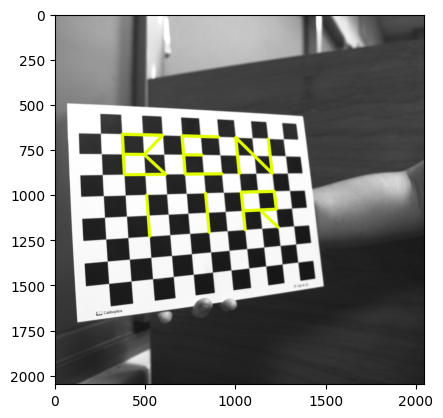

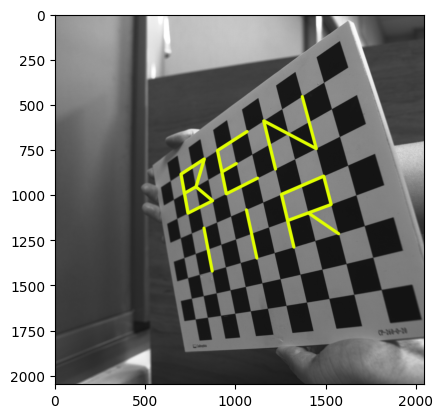

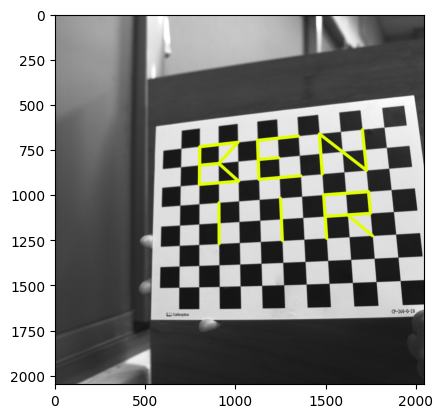

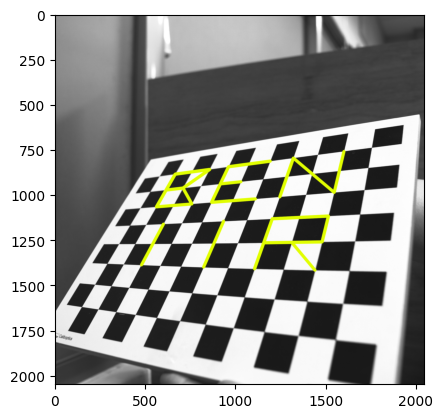

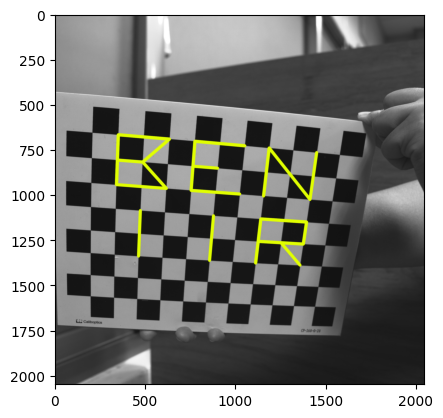

In [4]:
for index, image in enumerate(images):
    h, w = image.shape[:2]
    draw_image = image.copy()
    ret, intrinsic_mtx, dist, rvecs, tvecs = cv2.calibrateCamera(q2_objps, q2_imageps, (w,h), None, None)
    if ret:
        rvec = np.array(rvecs[index])
        tvec = np.array(tvecs[index]).reshape(3,1)
        for i_char, character in enumerate(string):
            ch = np.float32(fs.getNode(character).mat())
            line_list = []
            for i, eachline in  enumerate(ch):
                ach = np.float32([char_in_board[i_char], char_in_board[i_char]])
                eachline = np.add(eachline, ach)
                image_points, jac = cv2.projectPoints(eachline, rvec, tvec, intrinsic_mtx, dist)
                line_list.append(image_points)
                draw_image = draw_char(draw_image, line_list)
        cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB)
        plt.imshow(draw_image)
        plt.show()

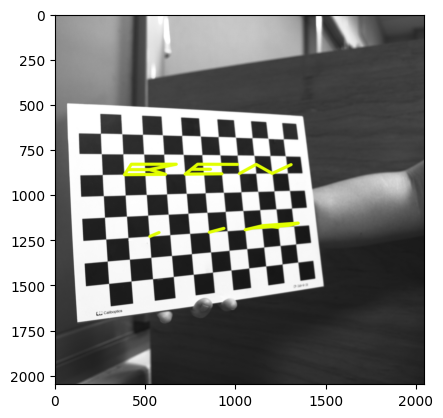

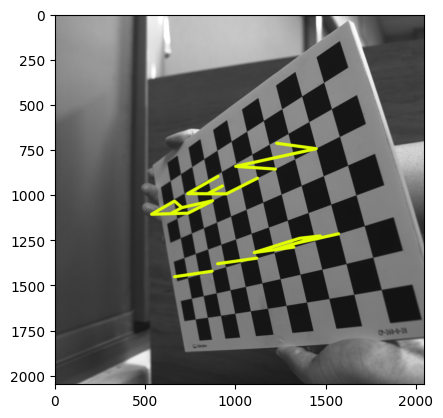

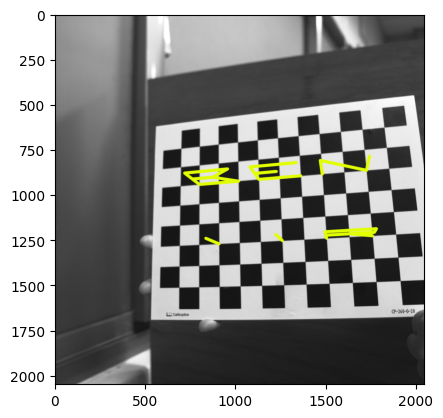

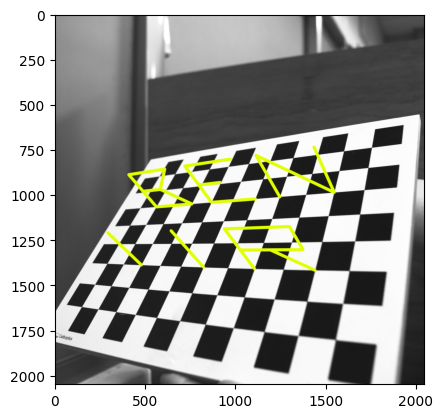

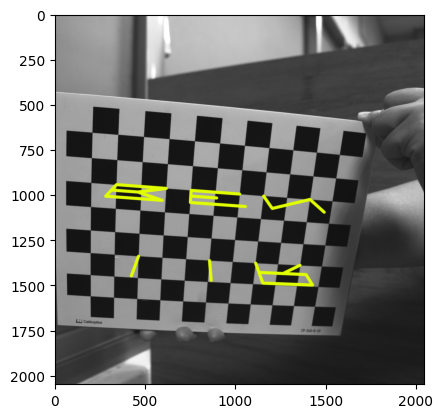

In [9]:
fs = cv2.FileStorage("Dataset_CvDl_Hw1/Q2_Image/Q2_lib/alphabet_lib_vertical.txt", cv2.FILE_STORAGE_READ)
for index, image in enumerate(images):
    h, w = image.shape[:2]
    draw_image = image.copy()
    ret, intrinsic_mtx, dist, rvecs, tvecs = cv2.calibrateCamera(q2_objps, q2_imageps, (w,h), None, None)
    if ret:
        rvec = np.array(rvecs[index])
        tvec = np.array(tvecs[index]).reshape(3,1)
        for i_char, character in enumerate(string):
            ch = np.float32(fs.getNode(character).mat())
            line_list = []
            for eachline in ch:
                ach = np.float32([char_in_board[i_char], char_in_board[i_char]])
                eachline = np.add(eachline, ach)
                image_points, jac = cv2.projectPoints(eachline, rvec, tvec, intrinsic_mtx, dist)
                line_list.append(image_points)
            draw_image = draw_char(draw_image, line_list)
        cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB)
        plt.imshow(draw_image)
        plt.show()